## 1. Data Description: Some new variations of an old disease have come which depends on gender and blood of the patients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("file.csv")
df.head()

,S.no,Gender,Sugar_Level,Blood_component_A,Blood_component_B,Blood_component_C,Height,Blood_component_D
0,0,Male,150,6.987503,3.125571,8.515168,190,-10.179726
1,1,Male,150,-2.400811,5.886076,1.445175,190,9.303857
2,2,Male,150,7.225148,6.240692,8.707427,190,-10.026728
3,3,Male,150,4.653442,1.291124,-0.540128,190,1.554792
4,4,Male,150,6.383007,6.388507,7.101920,190,-10.369927


## 2. Use data cleaning and transformation on the given dataset.

In [2]:
# Checking na in dataset
df.isna().sum()

S.no                 0
Gender               0
Sugar_Level          0
Blood_component_A    2
Blood_component_B    1
Blood_component_C    1
Height               0
Blood_component_D    1
dtype: int64

In [3]:
df=df.fillna(0)

In [4]:
df.isna().sum()

S.no                 0
Gender               0
Sugar_Level          0
Blood_component_A    0
Blood_component_B    0
Blood_component_C    0
Height               0
Blood_component_D    0
dtype: int64

In [5]:
# Removing Duplicates
df.duplicated().sum()


0

In [6]:
# Drop column that's not required
df.drop(["S.no","Height","Sugar_Level"],axis=1,inplace=True)
df['Gender']=df['Gender'].replace("Male",1).replace("Female",0)
df.head()
# df.tail()

,Gender,Blood_component_A,Blood_component_B,Blood_component_C,Blood_component_D
0,1,6.987503,3.125571,8.515168,-10.179726
1,1,-2.400811,5.886076,1.445175,9.303857
2,1,7.225148,6.240692,8.707427,-10.026728
3,1,4.653442,1.291124,-0.540128,1.554792
4,1,6.383007,6.388507,7.101920,-10.369927


In [7]:
df.tail()

,Gender,Blood_component_A,Blood_component_B,Blood_component_C,Blood_component_D
495,0,8.607937,-8.624392,-8.178292,1.212125
496,0,-2.129690,6.375274,-1.240179,9.501309
497,0,7.120702,5.675873,8.057511,-7.442512
498,0,8.266646,6.571732,7.927840,-9.368286
499,0,6.615513,6.832900,6.690389,-9.565085


In [8]:
# apply MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

df_n = df.copy()
min_max_scaler = MinMaxScaler()
df_n=x = df.iloc[:, [0,1,2,3,4]] #selected only numerical parameters
df_n.iloc[:, [1,2,3,4]] = min_max_scaler.fit_transform(df_n.iloc[:, [1,2,3,4]]) # min-max scaling
# df_n.head()
df_n.tail()

,Gender,Blood_component_A,Blood_component_B,Blood_component_C,Blood_component_D
495,0,0.855446,0.143323,0.126862,0.565798
496,0,0.148134,0.872192,0.462765,0.926937
497,0,0.757478,0.838207,0.912903,0.188737
498,0,0.832964,0.881739,0.906626,0.104836
499,0,0.724200,0.894429,0.846716,0.096261


## 3. Show the data head.

In [9]:
df_n.head()

,Gender,Blood_component_A,Blood_component_B,Blood_component_C,Blood_component_D
0,1,0.748704,0.714282,0.935060,0.069483
1,1,0.130274,0.848421,0.592773,0.918334
2,1,0.764358,0.865653,0.944369,0.076149
3,1,0.594954,0.625141,0.496657,0.580727
4,1,0.708885,0.872835,0.866639,0.061197


##  4. Implement following using sk-learn:

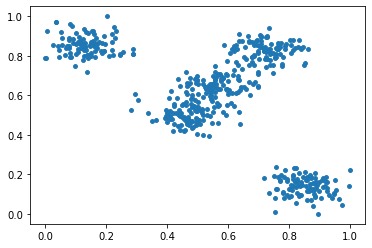

In [10]:
plt.scatter(df_n['Blood_component_A'],df_n['Blood_component_B'],s=15)
plt.show()

### a. DBSCAN


In [11]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.4, min_samples = 2).fit(df_n) #fit dataset
labels = db_default.labels_

In [12]:
set(labels)

{0, 1, 2, 3}

### b. OPTICS

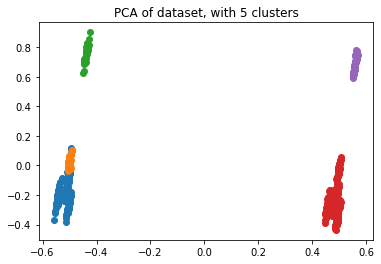

In [39]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(df_n).transform(df_n)
clustering = OPTICS(min_samples=44).fit(X_r)
set(clustering.labels_)
labels = clustering.labels_
plt.figure()
# plt.scatter(X_r[:,0],X_r[:,1])
plt.scatter(X_r[:,0][labels == -1],X_r[:,1][labels == -1])
plt.scatter(X_r[:,0][labels == 0],X_r[:,1][labels == 0])
plt.scatter(X_r[:,0][labels == 1],X_r[:,1][labels == 1])
plt.scatter(X_r[:,0][labels == 2],X_r[:,1][labels == 2])
plt.scatter(X_r[:,0][labels == 3],X_r[:,1][labels == 3])

plt.title("PCA of dataset, with 5 clusters")
plt.show()

## 5. Find total no of variation of the disease

Since there were **4** labels from the dataset after DBSCAN, thus 4 no. of variations of disease.

## 6. Find total no of noise points in data using DBSCAN

Don't have any -1 label from the DBSCAN with the mentioned parameters so **0** outliers.

## 7. Create 2D-plot for all clusters using all required features.

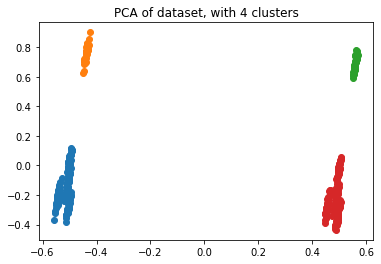

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(df_n).transform(df_n)
db_default = DBSCAN(eps = 0.4, min_samples = 2).fit(X_r) #fit dataset
labels = db_default.labels_
set(labels)
plt.figure()
# plt.scatter(X_r[:,0],X_r[:,1])
plt.scatter(X_r[:,0][labels == 0],X_r[:,1][labels == 0])
plt.scatter(X_r[:,0][labels == 1],X_r[:,1][labels == 1])
plt.scatter(X_r[:,0][labels == 2],X_r[:,1][labels == 2])
plt.scatter(X_r[:,0][labels == 3],X_r[:,1][labels == 3])

plt.title("PCA of dataset, with 4 clusters")
plt.show()
# X_r

## 8. Implement following:
    a. DENCLUE  https://www.kaggle.com/code/hassanashfaq2001/denclue-clustering-algorithm/notebook
    b. STING
    c. CLIQUE